<a href="https://colab.research.google.com/github/kuruvajayanth12/Neural-Networks-and-Deep-Learning/blob/main/Digit_recognition_DoubleDigit.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow.keras import layers, models
import matplotlib.pyplot as plt


In [ ]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

x_train = x_train / 255.0
x_test = x_test / 255.0


11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [ ]:
def create_double_digit(images, labels):
    X, y1, y2 = [], [], []

    for i in range(len(images)):
        j = np.random.randint(0, len(images))

        img = np.concatenate([images[i], images[j]], axis=1)
        X.append(img)

        y1.append(labels[i])
        y2.append(labels[j])

    X = np.array(X)[..., np.newaxis]
    return X, np.array(y1), np.array(y2)


X_train, y_left_train, y_right_train = create_double_digit(x_train, y_train)
X_test, y_left_test, y_right_test = create_double_digit(x_test, y_test)


In [ ]:
inputs = layers.Input(shape=(28, 56, 1))

x = layers.Conv2D(32, 3, activation='relu')(inputs)
x = layers.MaxPooling2D()(x)

x = layers.Conv2D(64, 3, activation='relu')(x)
x = layers.MaxPooling2D()(x)

x = layers.Flatten()(x)
x = layers.Dense(128, activation='relu')(x)

left = layers.Dense(10, activation='softmax', name='left_digit')(x)
right = layers.Dense(10, activation='softmax', name='right_digit')(x)

model = models.Model(inputs, [left, right])



In [ ]:
model.compile(
    optimizer='adam',
    loss={
        'left_digit': 'sparse_categorical_crossentropy',
        'right_digit': 'sparse_categorical_crossentropy'
    },
    metrics={
        'left_digit': 'accuracy',
        'right_digit': 'accuracy'
    }
)



In [ ]:
model.compile(
    optimizer='adam',
    loss={
        'left_digit': 'sparse_categorical_crossentropy',
        'right_digit': 'sparse_categorical_crossentropy'
    }
)



In [ ]:
model.fit(
    X_train,
    {
        'left_digit': y_left_train,
        'right_digit': y_right_train
    },
    epochs=5,
    batch_size=64,
    validation_split=0.1
)


Epoch 1/5
844/844 ━━━━━━━━━━━━━━━━━━━━ 95s 110ms/step - left_digit_accuracy: 0.8667 - left_digit_loss: 0.4415 - loss: 0.9002 - right_digit_accuracy: 0.8511 - right_digit_loss: 0.4587 - val_left_digit_accuracy: 0.9842 - val_left_digit_loss: 0.0610 - val_loss: 0.1323 - val_right_digit_accuracy: 0.9770 - val_right_digit_loss: 0.0711
Epoch 2/5
844/844 ━━━━━━━━━━━━━━━━━━━━ 92s 109ms/step - left_digit_accuracy: 0.9809 - left_digit_loss: 0.0628 - loss: 0.1204 - right_digit_accuracy: 0.9824 - right_digit_loss: 0.0576 - val_left_digit_accuracy: 0.9873 - val_left_digit_loss: 0.0480 - val_loss: 0.0976 - val_right_digit_accuracy: 0.9867 - val_right_digit_loss: 0.0493
Epoch 3/5
844/844 ━━━━━━━━━━━━━━━━━━━━ 89s 106ms/step - left_digit_accuracy: 0.9879 - left_digit_loss: 0.0398 - loss: 0.0769 - right_digit_accuracy: 0.9883 - right_digit_loss: 0.0371 - val_left_digit_accuracy: 0.9877 - val_left_digit_loss: 0.0458 - val_loss: 0.0890 - val_right_digit_accuracy: 0.9878 - val_right_digit_loss: 0.0429
Epoc

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 118ms/step


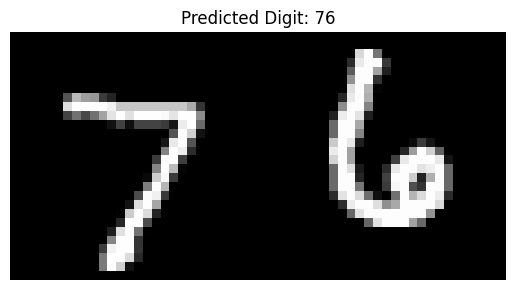

In [ ]:
idx = 0  # change index to see different samples
image = X_test[idx:idx+1]

pred_left, pred_right = model.predict(image)

d1 = np.argmax(pred_left)
d2 = np.argmax(pred_right)

predicted_digit = d1 * 10 + d2

plt.imshow(image[0].squeeze(), cmap='gray')
plt.title(f"Predicted Digit: {predicted_digit}")
plt.axis('off')
plt.show()
